# Семинар: Гистограммы изображений и их выравнивание

В этом семинаре мы рассмотрим, как:
- вычислять гистограммы изображений с помощью библиотек NumPy и OpenCV,
- применять метод выравнивания гистограммы для улучшения контраста изображения.

📝 Гистограмма изображения
Гистограмма изображения — это график, который показывает распределение интенсивности (яркости) пикселей в изображении. Она подсчитывает количество пикселей для каждого конкретного значения яркости (от 0 до 255). Это помогает понять, насколько изображение светлое, тёмное или контрастное.

## Часть 1: Расчёт гистограммы с помощью NumPy

In [4]:
# Импорт библиотеки OpenCV для работы с изображениями.
# OpenCV (Open Source Computer Vision Library) - это мощная библиотека
# для обработки изображений и компьютерного зрения.
import cv2

# Импорт библиотеки NumPy.
# NumPy - это фундаментальная библиотека для научных вычислений в Python,
# которая предоставляет поддержку массивов и матриц.
import numpy as np

# Импорт модуля pyplot из библиотеки Matplotlib.
# Matplotlib - это библиотека для создания статических, анимированных и интерактивных визуализаций в Python.
# pyplot - это набор функций, который упрощает создание графиков.
from matplotlib import pyplot as plt

# Установка размера для всех последующих графиков, чтобы они были более читабельными.
# [15, 5] означает ширину 15 дюймов и высоту 5 дюймов.
plt.rcParams['figure.figsize'] = [15, 5]

# Импорт модуля time для измерения времени выполнения кода.
from time import time

# Определение пути к папке с проектом и модулем.
# Это может быть полезно для организации файлов проекта.
project_dir = '/root/projects/study_projects/MUIV/cv_course/seminars'
modul_dir = project_dir + "/module02"

## 🖼️ Загрузка и отображение изображения
Давайте загрузим пример изображения, чтобы мы могли с ним работать. Здесь мы используем библиотеку OpenCV для чтения изображения.

Image loaded, shape is (512, 768, 3)


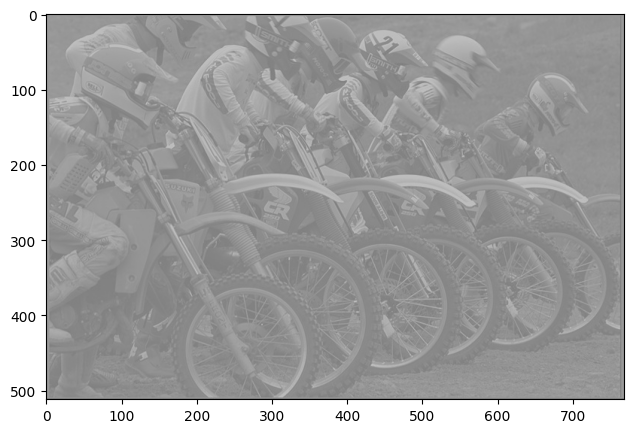

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import time

# Загрузка изображения.
# cv2.imread() читает изображение, путь к которому указан.
# Убедитесь, что у вас есть изображение 'example.png' по указанному пути.
img = cv2.imread(f"{modul_dir}/data/kodim05.jpg")

# Если изображение не было загружено (например, файл не найден), выведем ошибку.
if img is None:
    print('Failed to load image file')

# Если изображение не было загружено (например, файл не найден), выведем ошибку.
if img is None:
    print('Failed to load image file')

# Вывод информации о загруженном изображении.
# .shape возвращает размеры изображения (высота, ширина, количество каналов).
# Например, (500, 800, 3) для цветного изображения высотой 500 и шириной 800.
print('Image loaded, shape is', img.shape)
# Отображение изображения с помощью Matplotlib.
# Matplotlib по умолчанию ожидает изображения в формате RGB,
# тогда как OpenCV загружает их в формате BGR.
# Поэтому мы преобразуем BGR в RGB, чтобы цвета отображались корректно.
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB) выполняет это преобразование.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() # Отображение графика

## 📊 Построение гистограммы
Гистограмму можно построить для каждого из трех каналов цвета (синий, зеленый, красный) по отдельности. Здесь мы используем NumPy и Matplotlib для расчетов и визуализации.

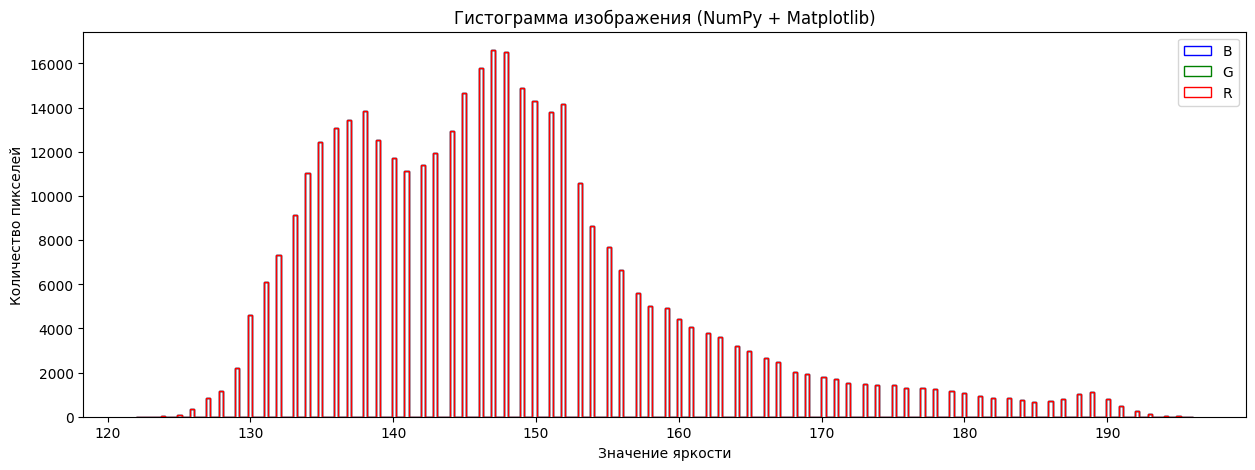

In [7]:
# Извлечение цветовых каналов B, G, R из изображения.
# img[:, :, 0] - это синий канал (Blue)
# img[:, :, 1] - это зеленый канал (Green)
# img[:, :, 2] - это красный канал (Red)
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

# Подсчет количества пикселей для каждого канала и построение гистограммы.
# plt.hist() - функция для построения гистограммы.
# Она подсчитывает количество пикселей для каждого значения яркости (от 0 до 255).
# `bins=256` указывает, что мы хотим 256 "корзин" (значений), по одной для каждого значения яркости.
# `histtype='step'` создает ступенчатую гистограмму.
# `color` задает цвет для каждого канала.
plt.hist(b.ravel(), bins=256, histtype='step', color='b', label='B')
plt.hist(g.ravel(), bins=256, histtype='step', color='g', label='G')
plt.hist(r.ravel(), bins=256, histtype='step', color='r', label='R')

# ravel() преобразует двумерный массив (канал изображения) в одномерный.
# Это необходимо, так как plt.hist() принимает одномерные данные.

# Добавление легенды к графику, чтобы различать каналы.
plt.legend()
# Добавление заголовка к графику.
plt.title('Гистограмма изображения (NumPy + Matplotlib)')
# Добавление подписей к осям.
plt.xlabel('Значение яркости')
plt.ylabel('Количество пикселей')
# Отображение гистограммы.
plt.show()

## 📈 Оценка производительности
Давайте сравним, как быстро можно построить гистограмму, используя встроенную функцию OpenCV cv2.calcHist().

In [8]:
# Использование функции cv2.calcHist() для построения гистограммы.
# Эта функция оптимизирована и работает очень быстро.
# Параметры:
# [img] - входное изображение.
# [0] - индексы каналов, для которых нужно построить гистограмму (здесь только для канала 0, то есть синего).
# None - маска (мы не используем).
# [256] - количество "корзин".
# [0, 256] - диапазон значений пикселей.
# Здесь мы строим гистограмму только для одного канала (синего), чтобы показать разницу в скорости.
t1 = time() # Запись начального времени
hist_cv = cv2.calcHist([img], [0], None, [256], [0, 256])
t2 = time() # Запись конечного времени
print('OpenCV time', t2 - t1) # Вывод времени выполнения для OpenCV

# Теперь измерим время для гистограммы, построенной с помощью NumPy.
t1 = time() # Запись начального времени
hist_np, bins = np.histogram(img[:, :, 0].ravel(), bins=256, range=[0, 256])
t2 = time() # Запись конечного времени
print('NumPy time', t2 - t1) # Вывод времени выполнения для NumPy

OpenCV time 0.0014417171478271484
NumPy time 0.002418994903564453


## 📈 Выравнивание гистограммы

Функция преобразования для выравнивания гистограммы — это кумулятивная функция распределения (КФР). КФР вычисляется на основе гистограммы изображения. Этот процесс помогает улучшить контрастность изображения, распределяя значения яркости пикселей более равномерно.

Гистограмма успешно вычислена. Количество значений: 256


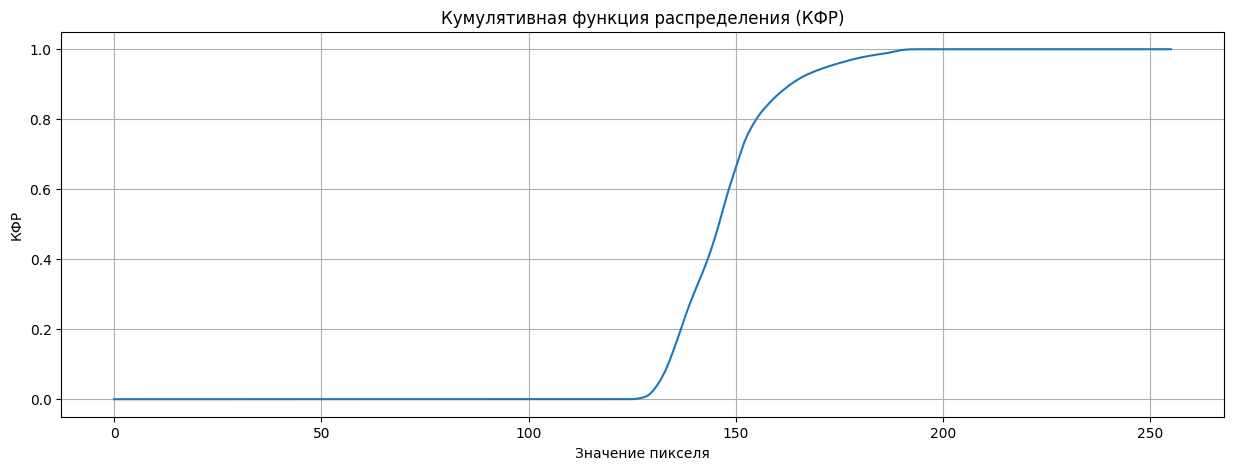

In [9]:
# Преобразование изображения в оттенки серого.
# cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) преобразует цветное изображение
# (загруженное в формате BGR) в серое.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Вычисление гистограммы для изображения в оттенках серого.
# np.histogram() возвращает два массива:
# hist — значения гистограммы (количество пикселей для каждой яркости).
# bins — границы "корзин" (диапазоны яркости).
# Мы используем ravel() для преобразования массива пикселей в одномерный.
hist, bins = np.histogram(gray.ravel(), 256, [0, 256])

# Проверяем, что гистограмма успешно создана.
print("Гистограмма успешно вычислена. Количество значений:", len(hist))

# ---- Далее идет уже знакомый вам код для вычисления КФР ----

# Вычисление кумулятивной функции распределения (КФР)
cdf = np.zeros(256)
for idx, h in enumerate(hist):
    cdf[idx] = np.sum(hist[0:idx+1])

# Нормализация КФР
cdf = cdf / np.sum(hist)

# Построение графика КФР
plt.plot(cdf)
plt.grid(True)
plt.xlabel('Значение пикселя')
plt.ylabel('КФР')
plt.title('Кумулятивная функция распределения (КФР)')
plt.show()

#

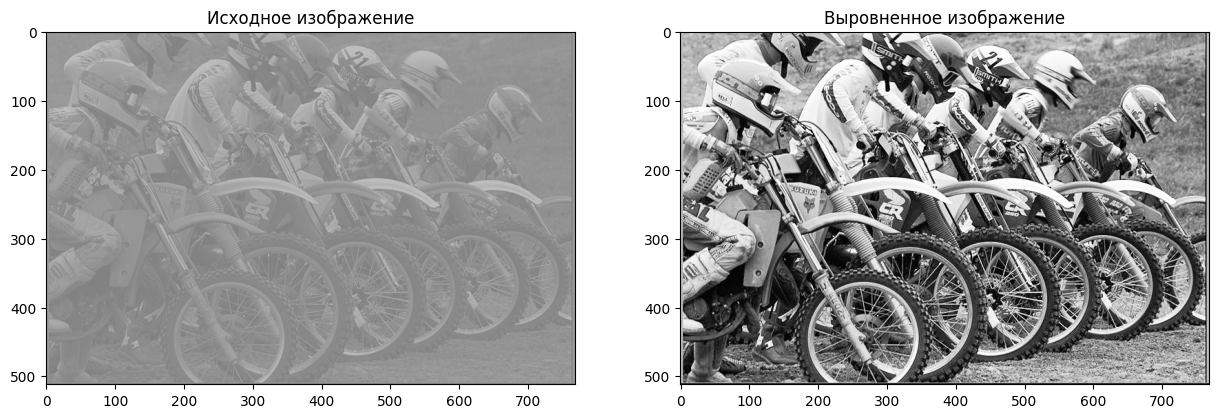

In [10]:
# Получение размеров изображения
# gray.shape возвращает кортеж (высота, ширина).
rows, cols = gray.shape

# Создание нового пустого массива для хранения выровненного изображения.
# np.zeros() создает массив, заполненный нулями.
# (rows, cols) — это размеры нового массива.
# dtype=np.uint8 указывает, что тип данных будет 8-битное целое число без знака,
# что идеально подходит для значений яркости пикселей (от 0 до 255).
equalized = np.zeros((rows, cols), dtype=np.uint8)

# Проход по каждому пикселю изображения и применение преобразования.
# Это "наивный" (медленный) способ, но он хорошо показывает логику процесса.
for r in range(rows):
    for c in range(cols):
        # Находим новое значение яркости для пикселя.
        # cdf[gray[r,c]] — это значение КФР для текущего пикселя (gray[r,c]).
        # Умножаем на 255, чтобы новое значение было в диапазоне от 0 до 255.
        equalized[r, c] = 255 * cdf[gray[r, c]]

# Отображение исходного и выровненного изображений для сравнения.
# plt.subplot(121) создает первый график в сетке 1x2.
# plt.imshow() отображает изображение.
# cmap='gray' указывает, что изображение должно быть отображено в оттенках серого.
# vmin=0, vmax=255 задают диапазон для отображения яркости.
plt.subplot(121), plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title('Исходное изображение')

# plt.subplot(122) создает второй график.
plt.subplot(122), plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Выровненное изображение')

plt.show()

### 💨 Эффективные методы
Здесь мы используем встроенную функцию NumPy, чтобы быстро посчитать гистограмму для изображения. np.histogram() выполняет всю работу за нас, возвращая гистограмму и границы "корзин".

Затраченное время: 0.006205320358276367


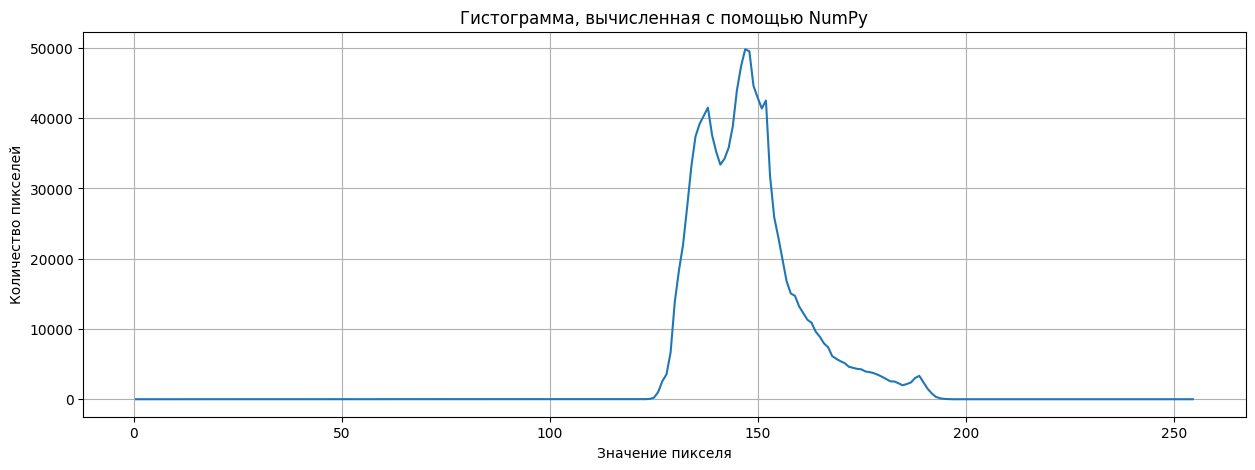

In [11]:
# Измерение времени выполнения.
# time() возвращает текущее время в секундах.
start = time()

# Вычисление гистограммы с помощью NumPy.
# img.ravel() преобразует изображение в одномерный массив,
# что необходимо для np.histogram().
# bins=256 указывает количество интервалов (от 0 до 255).
# range=(0, 255) задает диапазон значений пикселей.
hist, bins = np.histogram(img.ravel(), bins=256, range=(0, 255))

# Вывод затраченного времени.
print('Затраченное время:', time() - start)

# Построение гистограммы.
# bins[0:-1]+0.5 используется для центрирования столбцов гистограммы
# на графике, чтобы они соответствовали значениям яркости.
plt.plot(bins[0:-1] + 0.5, hist)
plt.grid(True)
plt.title('Гистограмма, вычисленная с помощью NumPy')
plt.xlabel('Значение пикселя')
plt.ylabel('Количество пикселей')
plt.show()

#

### 🎨 Адаптивное выравнивание гистограммы с ограничением контраста (CLAHE)
Выравнивание гистограммы может быть слишком агрессивным и не всегда подходит для всех изображений. Например, на изображении ниже, после выравнивания гистограммы детали тёмного колеса становятся слишком шумными и неестественными.

CLAHE (Contrast Limited Adaptive Histogram Equalization) — это более совершенный метод. Он работает с отдельными небольшими областями изображения, а не со всем изображением целиком. Это позволяет избежать излишнего усиления контраста в областях с низким контрастом и уменьшает шум.

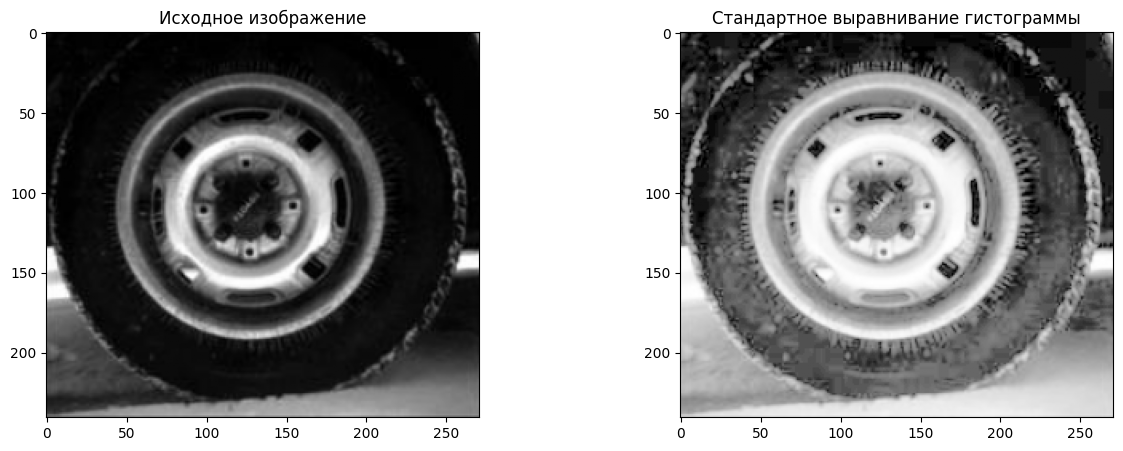

In [12]:
# Загрузка изображения с шиной.
# Убедитесь, что файл 'tire.png' находится в папке 'data'.
img = cv2.imread('data/tire.png')

# Преобразование изображения в оттенки серого, так как CLAHE, как правило,
# применяется к одноканальным изображениям.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Отображение исходного изображения и изображения,
# к которому применено стандартное выравнивание гистограммы.
# cv2.equalizeHist() — это встроенная функция OpenCV для стандартного выравнивания гистограммы.
plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Исходное изображение')
plt.subplot(122), plt.imshow(cv2.equalizeHist(img), cmap='gray', vmin=0, vmax=255)
plt.title('Стандартное выравнивание гистограммы')
plt.show()

#

##  📊 Визуализация преобразования CDF

 Стандартное выравнивание гистограммы может быть слишком агрессивным, потому что оно растягивает значения яркости на весь диапазон (от 0 до 255), даже если в исходном изображении почти все пиксели были очень тёмными. Это приводит к тому, что небольшие различия в тёмных областях превращаются в сильные, заметные изменения яркости.

Давайте посмотрим на график преобразования, который показывает, как значения пикселей в исходном изображении (ось X) преобразуются в новые значения (ось Y) с помощью КФР. Если КФР имеет крутой наклон в начале, это означает, что даже небольшое изменение в тёмной области приводит к значительному осветлению.

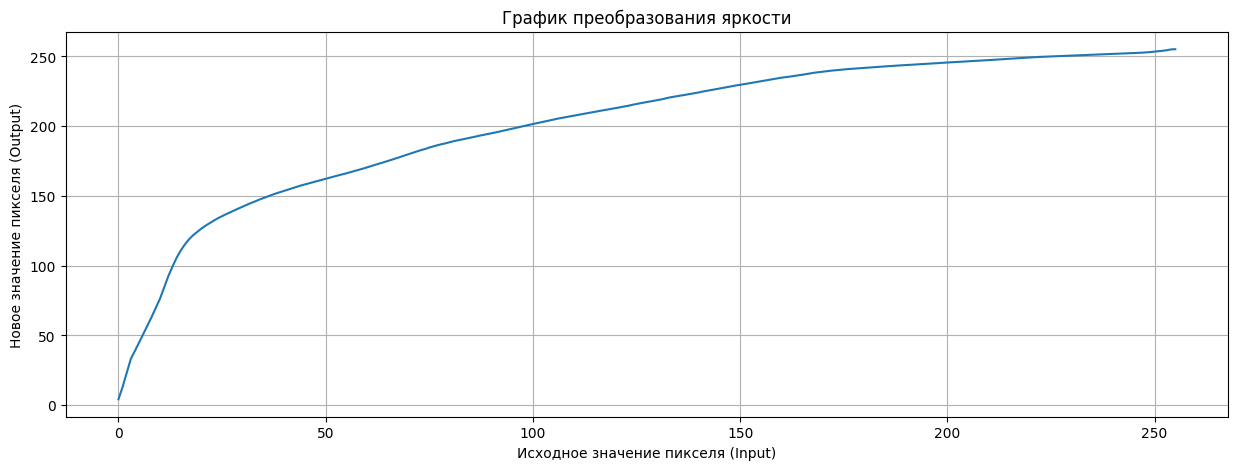

In [13]:
# Вычисление гистограммы для изображения в оттенках серого.
# np.histogram() — это быстрый способ получить гистограмму.
hist, bins = np.histogram(img.ravel(), bins=256, range=(0, 255))

# Вычисление и нормализация кумулятивной функции распределения (КФР).
# np.cumsum() — это векторизованная (очень быстрая) функция для вычисления
# кумулятивной суммы.
cdf = np.cumsum(hist / np.sum(hist))

# Построение графика преобразования.
# Мы умножаем КФР на 255, чтобы получить значения в диапазоне от 0 до 255.
plt.plot(255 * cdf)
#plt.axis('square') # Делаем оси графика одинакового масштаба.
plt.grid(True)
plt.title('График преобразования яркости')
plt.xlabel('Исходное значение пикселя (Input)')
plt.ylabel('Новое значение пикселя (Output)')
plt.show()

#

## ⚙️ Адаптивное выравнивание гистограммы с ограничением контраста (CLAHE)

Финальная часть ноутбука, посвященная CLAHE. Этот метод специально разработан для решения проблем, которые возникают при стандартном выравнивании гистограммы, особенно в изображениях с низким контрастом.

CLAHE ограничивает "агрессивность" преобразования, работая локально и не допуская чрезмерного усиления контраста. Он делает это двумя способами:

Адаптивность: Изображение делится на небольшие области (tileGridSize), и для каждой из них вычисляется своя собственная гистограмма и КФР.

Ограничение контраста: Любое значение в гистограмме, превышающее определённый порог (clipLimit), обрезается, и "излишек" равномерно распределяется по всем остальным значениям. Это предотвращает появление шума в областях с очень низким контрастом.

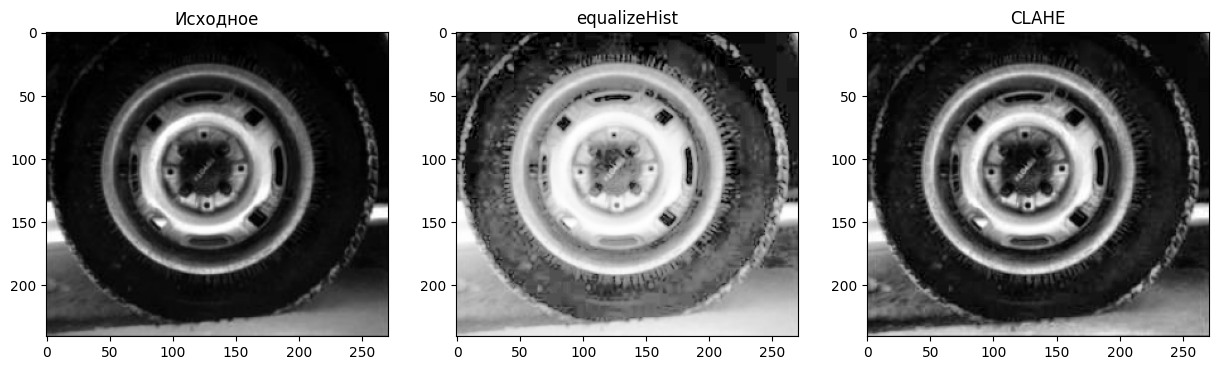

In [14]:
# Создание объекта CLAHE.
# cv2.createCLAHE() создает алгоритм CLAHE с заданными параметрами.
# clipLimit=2.0 — это порог для обрезания гистограммы.
# tileGridSize=(8, 8) — это размер сетки, на которую делится изображение.
# Чем меньше размер ячейки, тем более локальным и детальным будет выравнивание.
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Отображение трех изображений для сравнения:
# 1. Исходное изображение.
# 2. Изображение после стандартного выравнивания гистограммы.
# 3. Изображение после применения CLAHE.

plt.subplot(131), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Исходное')

plt.subplot(132), plt.imshow(cv2.equalizeHist(img), cmap='gray', vmin=0, vmax=255)
plt.title('equalizeHist')

plt.subplot(133), plt.imshow(clahe.apply(img), cmap='gray', vmin=0, vmax=255)
plt.title('CLAHE')

plt.show()

#

На графике видно, что CLAHE (третье изображение) значительно улучшает контрастность, не создавая при этом шума в тёмных областях, как это делает стандартное выравнивание.